#### BATCH GRADIENT DESCENT

In [1]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv(r"./data/house-prices-advanced-regression-techniques/train.csv")
df.shape

(1460, 81)

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
y = df['SalePrice']
X = df.loc[:, ('YearBuilt', 'OverallQual')]

<Figure size 432x288 with 0 Axes>

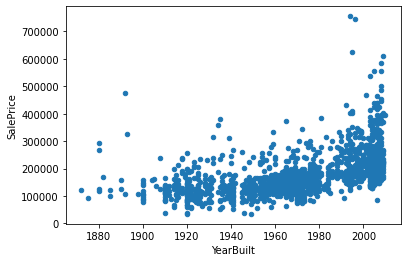

In [5]:
plt.figure()
df.plot.scatter(x="YearBuilt", y="SalePrice");

<Figure size 432x288 with 0 Axes>

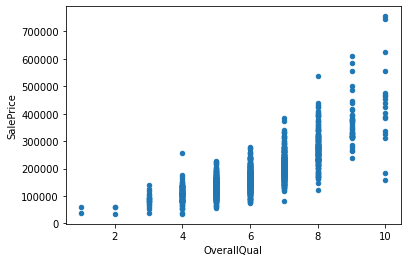

In [6]:
plt.figure()
df.plot.scatter(x="OverallQual", y="SalePrice");

In [7]:
n = X.shape[1]
m = X.shape[0]
W = np.random.uniform(size=n+1)
y = y.to_numpy()
X.loc[:,'b'] = 1
X = X.to_numpy()

In [8]:
W

array([0.61609075, 0.10387843, 0.51470856])

In [9]:
def h(W: ndarray, X: ndarray) -> float:
    return np.sum(np.multiply(W, X))

In [10]:
def loss_func(Y: ndarray, X: ndarray, W: ndarray) -> float:
    return np.sum([np.subtract(h(W, x), y) for x, y in zip(X, Y)])

In [11]:
def cost_func(loss: float) -> float:
    return (loss ** 2) / 2

In [12]:
def gradient_func(loss: float, X: ndarray, W:ndarray) -> list:
    return [np.sum(np.multiply(loss, x[:, j])) for x in X for j in range(len(W))]

In [13]:
def train(W: ndarray, X: ndarray, Y: ndarray, lr: float, epochs: int)-> ndarray:
    for i in range(epochs):
        loss = loss_func(Y, X, W)
        print(f'Current epoch: {i}, Running losses: {loss}')
        cost = cost_func(loss)
        print(f'Current epoch: {i}, Running cost: {cost}')
        gradient = gradient_func(loss, X, W)
        W = np.subtract(W, np.multiply(lr, gradient))
        print(f'Current epoch: {i}, Running Weights: {W}')
        print('-------------')
        
    return W

In [1]:
lr = 0.00000001
epochs = 59

result = train(W, X, y, lr, epochs)
result

NameError: name 'train' is not defined

In [ ]:
df = pd.read_csv(r"./data/house-prices-advanced-regression-techniques/test.csv")
df.columns

In [ ]:
X_test = df.loc[:, ('YearBuilt', 'OverallQual')]
X_test.loc[:,'b'] = 1
X_test = X_test.to_numpy()

In [ ]:
[h(result, x) for x in X_test]

In [ ]:
model = SGDRegressor(max_iter=1000, loss='squared_error')
model = model.fit(X,y)

In [ ]:
model.predict(X_test)